In [1]:
import pandas  as pd
import numpy as  np

In [2]:
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer 

In [3]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [4]:
df.dropna(inplace = True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state= 45)

In [9]:
x_train.head(2)

,Age,Fare
775,18.0,7.75
83,28.0,47.10


In [10]:
x_test.head(2)

,Age,Fare
68,17.0,7.925
854,44.0,26.000


In [11]:
y_train

775    0
83     0
759    1
286    1
323    1
      ..
205    0
761    0
687    0
806    0
520    1
Name: Survived, Length: 571, dtype: int64

In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.5804195804195804

In [16]:
# here we using the cross_val method 
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv = 10,scoring = 'accuracy'))

0.6359154929577465

In [35]:
kbin_age = KBinsDiscretizer(n_bins = 15,encode='ordinal',strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15,encode='ordinal',strategy = 'quantile')

In [36]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [37]:
x_train_trf  = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [38]:
# trf.named_transformers_
trf.named_transformers_['first'].n_bins_ # here .n_bins with this we check how much no of bins in the data

array([15])

In [39]:
trf.named_transformers_['first'].bin_edges_  # here with this we find the range 

array([array([ 0.42,  9.  , 17.  , 19.  , 21.  , 24.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 41.  , 47.  , 54.  , 74.  ])             ],
      dtype=object)

In [40]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [41]:
output['age_label'] = pd.cut(x = x_train['Age'],
                            bins =trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_label'] = pd.cut(x = x_train['Fare'],
                            bins =trf.named_transformers_['second'].bin_edges_[0].tolist())

In [42]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_label,fare_label
273,37.0,10.0,29.7000,10.0,"(35.0, 38.0]","(27.0, 31.275]"
174,56.0,14.0,30.6958,10.0,"(54.0, 74.0]","(27.0, 31.275]"
212,22.0,4.0,7.2500,1.0,"(21.0, 24.0]","(0.0, 7.25]"
676,24.5,5.0,8.0500,3.0,"(24.0, 25.0]","(7.896, 8.404]"
344,36.0,10.0,13.0000,6.0,"(35.0, 38.0]","(12.525, 13.0]"


In [45]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [46]:
accuracy_score(y_test,y_pred2)

0.6923076923076923

In [48]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv =10,scoring = 'accuracy'))

0.6288928012519561

In [52]:
# here we making the funtion 
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins,encode='ordinal',strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins ,encode='ordinal',strategy = strategy)

    trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    ])
    x_trf = trf.fit_transform(x)
    print( np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv =10,scoring = 'accuracy')))

    #    here using the ploting  for the dataframe 
    plt.figure(figsize = (14,5))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:,0],color = 'red')
    plt.title('After')

    plt.show()


    plt.figure(figsize = (14,5))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:,1],color = 'red')
    plt.title('After')

    plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is

0.6289514866979655


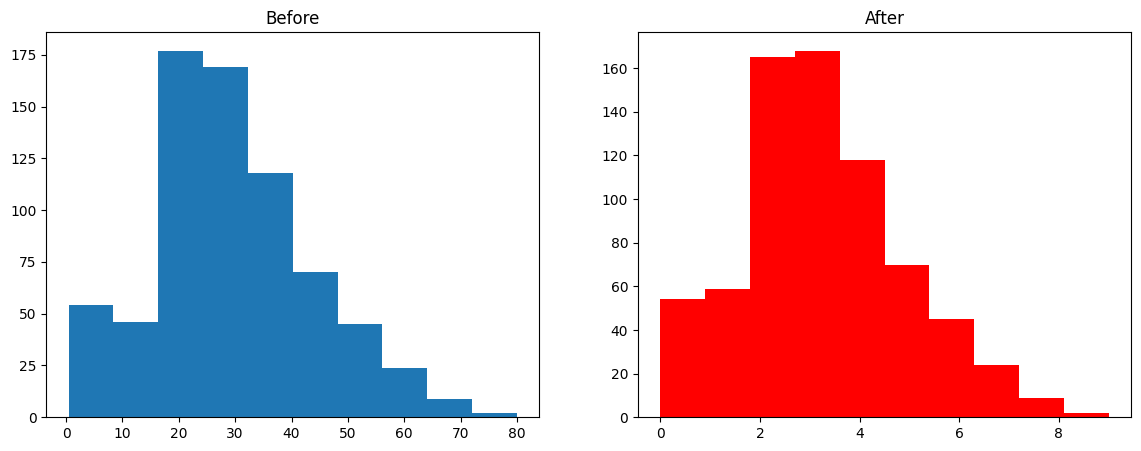

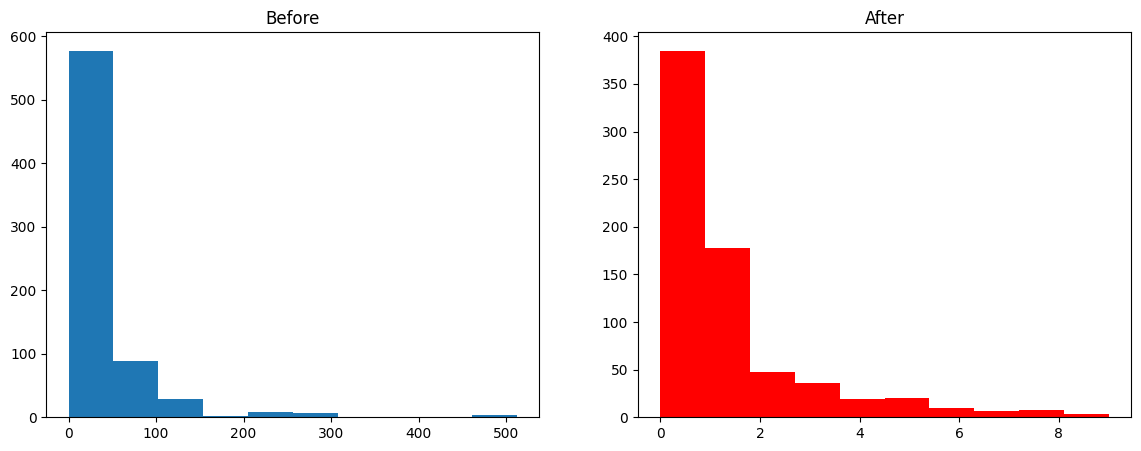

In [55]:
# discretize(10,'quantile')
discretize(10,'kmeans')